In [1]:
# first neural network with keras tutorial
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from sklearn.preprocessing import StandardScaler
from keras import regularizers
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv('creditcard2.csv', delimiter=',')

In [3]:
RANDOM_SEED = 314 #used to help randomly select the data points
TEST_PCT = 0.3 # 20% of the data
dataset.shape

(284807, 31)

Text(0, 0.5, 'Frequency')

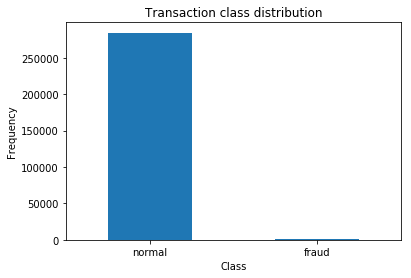

In [4]:
# Let's plot the Transaction class against the Frequency
labels = ['normal','fraud']
classes = pd.value_counts(dataset['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [5]:
dataset['Time'] = StandardScaler().fit_transform(dataset['Time'].values.reshape(-1, 1))
dataset['Amount'] = StandardScaler().fit_transform(dataset['Amount'].values.reshape(-1, 1))

In [6]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [11]:
from sklearn.model_selection import train_test_split
# 80% for the training set and 20% for the testing set
train, test = train_test_split(dataset, test_size=TEST_PCT,random_state=RANDOM_SEED)
test, val = train_test_split(test, test_size=TEST_PCT,random_state=RANDOM_SEED)

In [12]:
train_x = train.loc[train['Class'] == 0]
train_x = train_x.drop(['Class'], axis=1)

val_y = val['Class']
val_x = val.drop(['Class'], axis=1)

test_y = test['Class']
test_x = test.drop(['Class'], axis=1)

In [13]:
print('Shapes are: Train=',train.shape,' Validation=',val.shape,' Test=',test.shape)

Shapes are: Train= (199364, 31)  Validation= (25633, 31)  Test= (59810, 31)


In [14]:
from keras.layers import Input, Dense
from keras.models import Model

In [15]:
# this is the size of our encoded representations
nb_epoch = 100
batch_size = 128
input_dim = train_x.shape[1]
encoding_dim = int(input_dim / 2) - 1
hidden_dim = int(encoding_dim / 2)
learning_rate = 1e-7

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(encoding_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.summary()

autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])


W1111 16:36:09.736761 140230354413376 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1111 16:36:09.751610 140230354413376 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1111 16:36:09.754782 140230354413376 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1111 16:36:09.796591 140230354413376 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.t

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 14)                434       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 14)                112       
_________________________________________________________________
dense_4 (Dense)              (None, 30)                450       
Total params: 1,101
Trainable params: 1,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp = ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

history = autoencoder.fit(train_x, train_x,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(val_x, val_x),
                    verbose=1,
                    callbacks=[cp, tb]).history

W1111 16:36:15.771705 140230354413376 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1111 16:36:15.850600 140230354413376 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 199036 samples, validate on 25633 samples


W1111 16:36:16.336565 140230354413376 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W1111 16:36:16.337325 140230354413376 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Epoch 1/100
199036/199036 [==============================] - 4s 23us/step - loss: 0.8487 - acc: 0.5363 - val_loss: 0.8349 - val_acc: 0.6171
Epoch 2/100
199036/199036 [==============================] - 4s 18us/step - loss: 0.7557 - acc: 0.6331 - val_loss: 0.7792 - val_acc: 0.6434
Epoch 3/100
199036/199036 [==============================] - 4s 18us/step - loss: 0.7248 - acc: 0.6670 - val_loss: 0.7598 - val_acc: 0.6827
Epoch 4/100
199036/199036 [==============================] - 4s 18us/step - loss: 0.7120 - acc: 0.6868 - val_loss: 0.7514 - val_acc: 0.6867
Epoch 5/100
199036/199036 [==============================] - 4s 18us/step - loss: 0.7060 - acc: 0.6913 - val_loss: 0.7469 - val_acc: 0.6875
Epoch 6/100
199036/199036 [==============================] - 4s 18us/step - loss: 0.7022 - acc: 0.6953 - val_loss: 0.7436 - val_acc: 0.6948
Epoch 7/100
199036/199036 [==============================] - 4s 18us/step - loss: 0.6991 - acc: 0.6999 - val_loss: 0.7402 - val_acc: 0.7020
Epoch 8/100
199036/1

199036/199036 [==============================] - 4s 18us/step - loss: 0.6715 - acc: 0.7193 - val_loss: 0.7224 - val_acc: 0.7180
Epoch 60/100
199036/199036 [==============================] - 4s 18us/step - loss: 0.6713 - acc: 0.7204 - val_loss: 0.7141 - val_acc: 0.7157
Epoch 61/100
199036/199036 [==============================] - 4s 18us/step - loss: 0.6712 - acc: 0.7196 - val_loss: 0.7142 - val_acc: 0.7175
Epoch 62/100
199036/199036 [==============================] - 4s 18us/step - loss: 0.6712 - acc: 0.7198 - val_loss: 0.7244 - val_acc: 0.7145
Epoch 63/100
199036/199036 [==============================] - 4s 18us/step - loss: 0.6709 - acc: 0.7198 - val_loss: 0.7142 - val_acc: 0.7122
Epoch 64/100
199036/199036 [==============================] - 4s 18us/step - loss: 0.6709 - acc: 0.7203 - val_loss: 0.7128 - val_acc: 0.7205
Epoch 65/100
199036/199036 [==============================] - 4s 18us/step - loss: 0.6710 - acc: 0.7193 - val_loss: 0.7128 - val_acc: 0.7208
Epoch 66/100
199036/199036

In [17]:
from sklearn.metrics import confusion_matrix, precision_recall_curve,cohen_kappa_score
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score

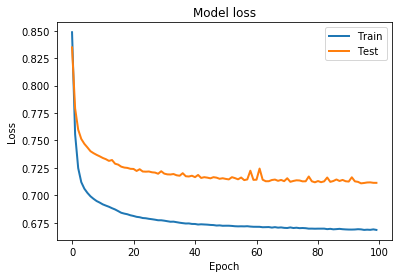

In [18]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [19]:
y_pred = autoencoder.predict(test_x)
mse = np.mean(np.power(test_x - y_pred, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,'true_class': test_y})
error_df.describe()

,reconstruction_error,true_class
count,59810.000000,59810.000000
mean,0.713693,0.001939
std,3.201032,0.043997
min,0.041934,0.000000
25%,0.241293,0.000000
50%,0.375695,0.000000
75%,0.599329,0.000000
max,204.075634,1.000000


## Reconstruction error without fraud

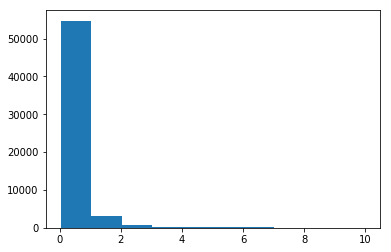

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)


## Reconstruction error with fraud

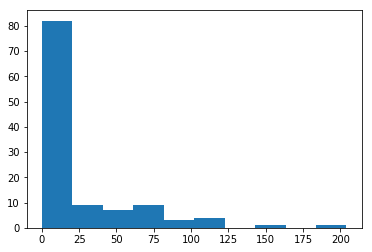

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

In [22]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

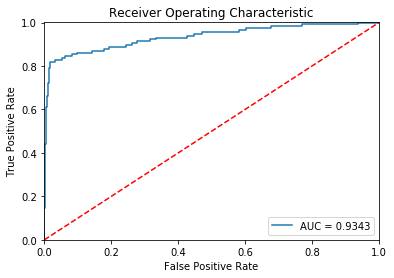

In [23]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

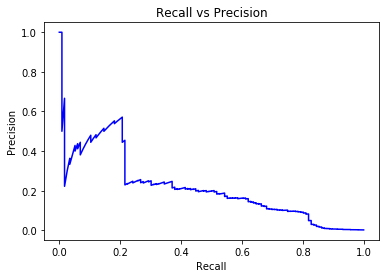

In [24]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

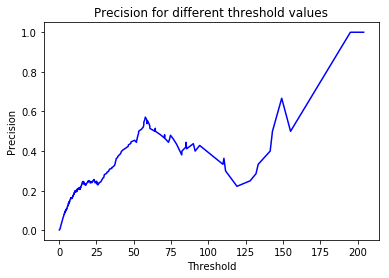

In [25]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

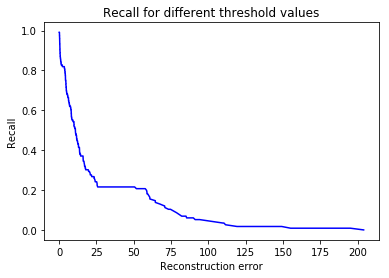

In [26]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

In [27]:
threshold = 2.9

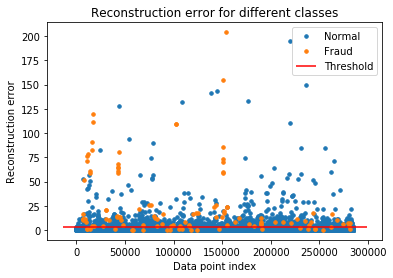

In [28]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [29]:
import seaborn as sns
LABELS = ["Normal", "Fraud"]

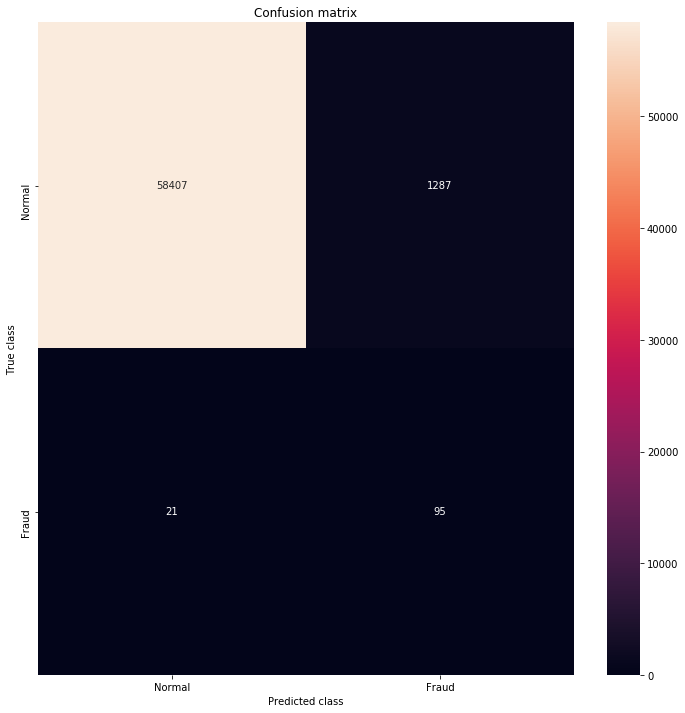

In [30]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [31]:
from sklearn.metrics import precision_score,accuracy_score
precision_score(y_true=error_df.true_class, y_pred=y_pred) 

0.06874095513748191

In [32]:
precision_score(y_true=error_df.true_class, y_pred=y_pred)
accuracy_score(y_true=error_df.true_class, y_pred=y_pred)

0.9781307473666611

In [34]:
print ("")
print ("Classification Report: ")
print (classification_report(y_true=error_df.true_class, y_pred=y_pred))

print ("")
print ("Accuracy Score: ", accuracy_score(y_true=error_df.true_class, y_pred=y_pred))


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     59694
           1       0.07      0.82      0.13       116

    accuracy                           0.98     59810
   macro avg       0.53      0.90      0.56     59810
weighted avg       1.00      0.98      0.99     59810


Accuracy Score:  0.9781307473666611
